# Selección del DataSet

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
# Cargar datos
df = pd.read_csv("laptop_prices.csv")
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")



Cantidad de filas: 1275
Cantidad de columnas: 23


In [90]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


# Preparación de los Datos

In [91]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


| Nº  | Columna                | Descripción                                                               | Tipo de Dato  |
|-----|------------------------|----------------------------------------------------------------------------|---------------|
|  0  | Company                | Fabricante de la laptop.                                                  | object        |
|  1  | Product                | Marca y modelo de la laptop.                                              | object        |
|  2  | TypeName               | Tipo de laptop (Notebook, Ultrabook, Gaming, etc.).                       | object        |
|  3  | Inches                 | Tamaño de la pantalla (pulgadas).                                         | float64       |
|  4  | Ram                    | Cantidad total de RAM en GB.                                              | int64         |
|  5  | OS                     | Sistema operativo instalado.                                              | object        |
|  6  | Weight                 | Peso de la laptop en kilogramos.                                          | float64       |
|  7  | Price_euros            | Precio de la laptop en euros (variable objetivo).                         | float64       |
|  8  | Screen                 | Resolución de pantalla (Standard, Full HD, 4K Ultra HD, Quad HD+).        | object        |
|  9  | ScreenW                | Ancho de la pantalla en píxeles.                                          | int64         |
| 10  | ScreenH                | Alto de la pantalla en píxeles.                                           | int64         |
| 11  | Touchscreen            | ¿Tiene pantalla táctil? (Yes/No).                                         | object        |
| 12  | IPSpanel               | ¿Tiene panel IPS? (Yes/No).                                               | object        |
| 13  | RetinaDisplay          | ¿Tiene pantalla retina? (Yes/No).                                         | object        |
| 14  | CPU_company            | Fabricante del procesador (ej. Intel, AMD).                               | object        |
| 15  | CPU_freq               | Frecuencia del procesador en Hz.                                          | float64       |
| 16  | CPU_model              | Modelo específico del procesador.                                         | object        |
| 17  | PrimaryStorage         | Espacio de almacenamiento primario (GB).                                  | int64         |
| 18  | SecondaryStorage       | Espacio de almacenamiento secundario si lo hay (GB).                      | int64         |
| 19  | PrimaryStorageType     | Tipo de almacenamiento primario (HDD, SSD, Flash, Híbrido).               | object        |
| 20  | SecondaryStorageType   | Tipo de almacenamiento secundario (HDD, SSD, Híbrido, Ninguno).           | object        |
| 21  | GPU_company            | Fabricante de la tarjeta gráfica (ej. Nvidia, AMD).                       | object        |
| 22  | GPU_model              | Modelo específico de la tarjeta gráfica.                                  | object        |


# Verificar filas duplicadas

In [92]:
dups = df.duplicated()
print('Número de filas duplicadas = %d' % (dups.sum()))
print('Antes', df.shape)
df.drop_duplicates(inplace=True)
print('Después', df.shape)

Número de filas duplicadas = 0
Antes (1275, 23)
Después (1275, 23)


In [93]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


# Tratamiento de Valores Faltantes:
 Generar y tratar valores nulos si no existen en el DataSet. Explicar y justificar la técnica utilizada.


In [94]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [95]:
for col in df.columns:
    print(f"\n  Columna: {col}")
    print(df[col].dropna().unique())



  Columna: Company
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

  Columna: Product
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-600

In [96]:
for column in df.columns:
    if df[column].dtype == 'float64':
        median = df[column].median()
        df[column] = df[column].fillna(median)

df.isnull().sum()


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

# Conversión de Atributos: 
Convertir atributos de texto a numéricos si es necesario. Explicar la necesidad de esta conversión.

In [97]:


for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')
        

COMPANY :  19
Company
Huawei         2
Fujitsu        3
Google         3
Chuwi          3
LG             3
Vero           4
Xiaomi         4
Microsoft      6
Mediacom       7
Razer          7
Samsung        9
Apple         21
Toshiba       48
MSI           54
Acer         101
Asus         152
HP           268
Lenovo       289
Dell         291
Name: count, dtype: int64


PRODUCT :  618
Product
GT72VR Dominator                            1
Latitude 5490                               1
15-bs018nq (i3-6006U/4GB/500GB/FHD/No       1
V330-15IKB (i5-8250U/8GB/256GB/FHD/W10)     1
Precision 7720                              1
                                           ..
Legion Y520-15IKBN                         19
Vostro 3568                                19
250 G6                                     21
Inspiron 3567                              25
XPS 13                                     30
Name: count, Length: 618, dtype: int64


TYPENAME :  6
TypeName
Netbook                23
Workstat

In [98]:
from sklearn.preprocessing import OrdinalEncoder

# Crear el encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = [
    'Company', 'Product','Touchscreen','IPSpanel', 'TypeName', 'OS', 'Screen', 
    'RetinaDisplay', 'CPU_company', 'CPU_model', 
    'PrimaryStorageType', 'SecondaryStorageType', 
    'GPU_company', 'GPU_model'
]
# Aplicar solo a las columnas categóricas
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [99]:
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\nColumna: {col}")
    print(f"Valores únicos: {unique_count}")
    
    if unique_count <= 20:  # Mostrar todos si son pocos
        print(df[col].unique())
    else:
        print("Muestra de valores:", df[col].unique()[:10], "...")  # Muestra los primeros 10
        print("Valor más frecuente:", df[col].mode()[0])


Columna: Company
Valores únicos: 19
[ 1.  7.  0.  2.  4. 10.  3. 11. 13. 16.  8. 18. 17. 14. 12. 15.  6.  5.
  9.]

Columna: Product
Valores únicos: 618
Muestra de valores: [300. 301.  50.  58. 608. 430. 239. 298. 209. 576.] ...
Valor más frecuente: 576.0

Columna: Touchscreen
Valores únicos: 2
[0. 1.]

Columna: IPSpanel
Valores únicos: 2
[1. 0.]

Columna: TypeName
Valores únicos: 6
[4. 3. 2. 1. 0. 5.]

Columna: OS
Valores únicos: 9
[8. 4. 5. 3. 2. 0. 6. 1. 7.]

Columna: Screen
Valores únicos: 4
[3. 1. 2. 0.]

Columna: RetinaDisplay
Valores únicos: 2
[1. 0.]

Columna: CPU_company
Valores únicos: 3
[1. 0. 2.]

Columna: CPU_model
Valores únicos: 93
Muestra de valores: [40. 46. 54. 11. 70. 53. 36. 33. 62. 38.] ...
Valor más frecuente: 46.0

Columna: PrimaryStorageType
Valores únicos: 4
[3. 0. 1. 2.]

Columna: SecondaryStorageType
Valores únicos: 4
[2. 0. 3. 1.]

Columna: GPU_company
Valores únicos: 4
[2. 0. 3. 1.]

Columna: GPU_model
Valores únicos: 110
Muestra de valores: [ 60.  53.  55

# Escalado de Atributos:
 Normalizar los valores de X si es necesario, justificando la decisión.

In [100]:
from sklearn.preprocessing import StandardScaler

# 1. Columnas numéricas a escalar (ajusta según necesidad)
cols_to_scale = [
    'Company',
    'Product',
    'TypeName',
    'OS',
    'Screen',
    'Touchscreen',
    'IPSpanel',
    'RetinaDisplay',
    'CPU_company',
    'CPU_model',
    'PrimaryStorageType',
    'SecondaryStorageType',
    'GPU_company',
    'GPU_model'
]


# 2. Escalado
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# 3. Separar características (X) y variable objetivo (y)
X = df_scaled.drop('Price_euros', axis=1)  # Todas las columnas excepto el precio
y = df_scaled['Price_euros']  # Variable a predecir
X

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,-1.333546,-0.042870,1.136135,13.3,8,3.081382,1.37,1.517400,2560,1600,...,8.602325,0.216459,2.3,-0.603861,128,0,0.704979,0.42945,-0.039845,0.361316
1,-1.333546,-0.037025,1.136135,13.3,8,3.081382,1.34,1.517400,1440,900,...,-0.116248,0.216459,1.8,-0.603861,128,0,-2.166740,0.42945,-0.039845,0.096776
2,0.131784,-1.504040,0.334490,15.6,8,-0.787414,1.86,-0.600482,1920,1080,...,-0.116248,0.216459,2.5,-0.250415,256,0,0.704979,0.42945,-0.039845,0.172359
3,-1.333546,-0.042870,1.136135,15.4,16,3.081382,1.83,1.517400,2880,1800,...,8.602325,0.216459,2.7,0.220846,512,0,0.704979,0.42945,-2.201665,1.117146
4,-1.333546,-0.042870,1.136135,13.3,8,3.081382,1.37,1.517400,2560,1600,...,8.602325,0.216459,3.1,-0.603861,256,0,0.704979,0.42945,-0.039845,0.399108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.864449,1.593640,-2.070444,14.0,4,0.179785,1.80,-0.600482,1920,1080,...,-0.116248,0.216459,2.5,0.279753,128,0,0.704979,0.42945,-0.039845,-0.054390
1271,0.864449,1.640397,-2.070444,13.3,16,0.179785,1.30,0.458459,3200,1800,...,-0.116248,0.216459,2.5,0.279753,512,0,0.704979,0.42945,-0.039845,-0.054390
1272,0.864449,-0.650717,0.334490,14.0,2,0.179785,1.50,1.517400,1366,768,...,-0.116248,0.216459,1.6,-1.782013,64,0,-2.166740,0.42945,-0.039845,-0.318931
1273,0.131784,-1.784584,0.334490,15.6,6,0.179785,2.19,1.517400,1366,768,...,-0.116248,0.216459,2.5,0.279753,1024,0,-1.209500,0.42945,-2.201665,1.570644


Selección de Atributos: Seleccionar entre 4 y 6 atributos utilizando RFE, matriz de correlación y árboles de decisión. Justificar, con base en los tres métodos la elección y exclusión de atributos.


In [101]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeRegressor

# model_tree_rfe = DecisionTreeRegressor(random_state=42)

# # Elegir un número razonable (ej. 12 o la mitad de columnas)
# n_features_to_select = 15  # O: X.shape[1] // 2

# rfe = RFE(estimator=model_tree_rfe, n_features_to_select=n_features_to_select)
# rfe.fit(X, y)

# selected_columns_rfe = X.columns[rfe.support_]
# print(f"Atributos seleccionados por RFE ({n_features_to_select}):")
# print(selected_columns_rfe.tolist())


In [102]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

model = DecisionTreeRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

selector = RFECV(estimator=model, step=1, cv=cv, scoring='r2')
selector.fit(X, y)

print("Número óptimo de características:", selector.n_features_)
selected_columns_combined = X.columns[selector.support_].tolist()
print("Columnas seleccionadas:", selected_columns_combined)


Número óptimo de características: 22
Columnas seleccionadas: ['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [103]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns_combined], y, test_size=0.2, random_state=42)


#   Modelado:


Entrenamiento de Modelos: Entrenar dos modelos de regresión, uno de los cuales debe ser una red neuronal (el otro modelo no debe ser red neuronal). Utilizar k-fold cross-validation.


# RandomForestRegressor 

In [104]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest - R² medio en validación cruzada: {cv_scores_rf.mean():.2f}")


Random Forest - R²: 0.87, RMSE: 251.77, MAE: 161.71
Random Forest - R² medio en validación cruzada: 0.84


In [105]:
# # Obtener importancias de características del modelo de árbol ya entrenado
# importances = model_rf.feature_importances_

# # Seleccionar todas las características con importancia mayor a 0
# selected_columns_importance = X.columns[importances > 0]
# print(f"Atributos seleccionados por importancia de características: {selected_columns_importance.tolist()}")
# print(f"Total de atributos seleccionados: {len(selected_columns_importance)}")

# # Combinar con las seleccionadas por RFE
# selected_columns_combined = list(set(selected_columns_rfe) | set(selected_columns_importance))
# print(f"Atributos combinados seleccionados: {selected_columns_combined}")


# GradientBoostingRegressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting - R²: {r2_gb:.2f}, RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}")

cv_scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting - R² medio en validación cruzada: {cv_scores_gb.mean():.2f}")


Gradient Boosting - R²: 0.89, RMSE: 229.91, MAE: 167.09
Gradient Boosting - R² medio en validación cruzada: 0.85


# red neuronal

In [107]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model_nn = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(512, 256, 128, 64),
        max_iter=3000,
        learning_rate_init=0.0005,
        alpha=0.0001,
        early_stopping=True,
        activation='relu',
        random_state=42
    )
)
# Entrenamiento
model_nn.fit(X_train, y_train)

# Evaluación
y_pred_nn = model_nn.predict(X_test)
# y_pred
cv_r2 = cross_val_score(model_nn, X_train, y_train, cv=5, scoring='r2')
print(f"Validación cruzada - R² medio: {cv_r2.mean():.4f}")


Validación cruzada - R² medio: 0.7711


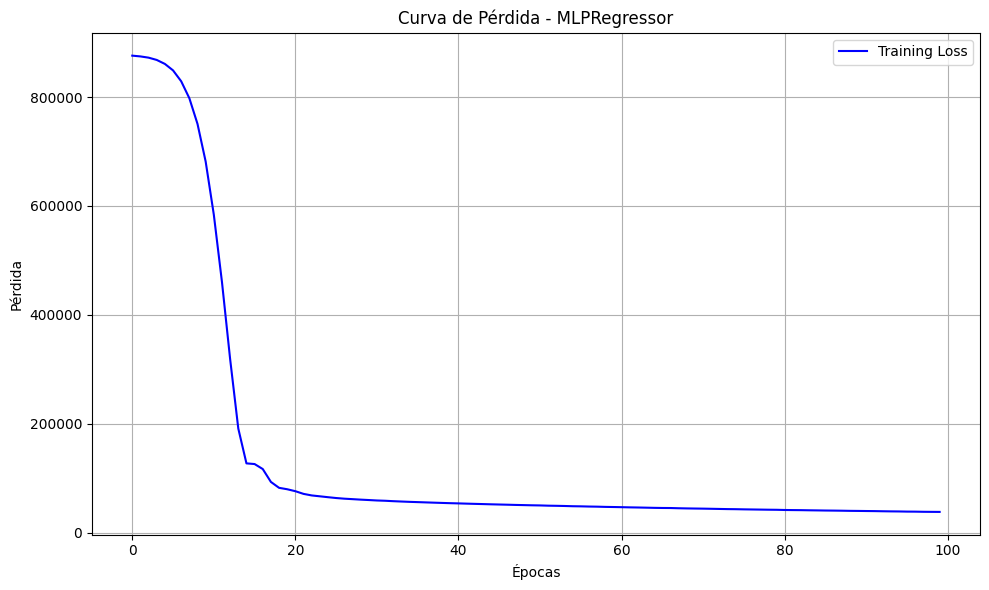

In [108]:
import matplotlib.pyplot as plt

# Acceder a la curva de pérdida
loss_curve = model_nn.named_steps['mlpregressor'].loss_curve_

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Training Loss', color='blue')
plt.title('Curva de Pérdida - MLPRegressor')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#   Evaluación de Modelos:


Métricas de Evaluación: Evaluar los modelos utilizando R² y alguna otra métrica adecuada (RMSE, MAE), realizar validación cruzada y reportar la media, desviación	estándar y varianza.


In [109]:
# Evaluación de modelos: R², RMSE y MAE en test, más validación cruzada

def print_metrics(name, y_true, y_pred, cv_scores):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} - R²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    print(f"{name} - CV R² mean: {cv_scores.mean():.4f}, std: {cv_scores.std():.4f}, var: {cv_scores.var():.4f}")
    print('-'*80)

# Random Forest
print_metrics("Random Forest", y_test, y_pred_rf, cv_scores_rf)

# Gradient Boosting
print_metrics("Gradient Boosting", y_test, y_pred_gb, cv_scores_gb)

# Red Neuronal (MLP Regressor)
print_metrics("MLP Regressor", y_test, y_pred_nn, cv_scores_nn)

Random Forest - R²: 0.8723, RMSE: 251.77, MAE: 161.71
Random Forest - CV R² mean: 0.8363, std: 0.0276, var: 0.0008
--------------------------------------------------------------------------------
Gradient Boosting - R²: 0.8935, RMSE: 229.91, MAE: 167.09
Gradient Boosting - CV R² mean: 0.8464, std: 0.0244, var: 0.0006
--------------------------------------------------------------------------------
MLP Regressor - R²: 0.8010, RMSE: 314.30, MAE: 218.15
MLP Regressor - CV R² mean: 0.7711, std: 0.0605, var: 0.0037
--------------------------------------------------------------------------------


In [110]:

# # Random Forest
# cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')
# print(f"Random Forest - R² medio en validación cruzada: {cv_scores_rf.mean():.4f}")
# print(f"Random Forest - STD: {cv_scores_rf.std():.4f}, VAR: {cv_scores_rf.var():.4f}")
# print(f"---------------------------------------------")
# # Gradient Boosting
# cv_scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='r2')
# print(f"Gradient Boosting - R² medio en validación cruzada: {cv_scores_gb.mean():.4f}")
# print(f"Gradient Boosting - STD: {cv_scores_gb.std():.4f}, VAR: {cv_scores_gb.var():.4f}")
# print(f"---------------------------------------------")
# # Red Neuronal (MLP Regressor)

# cv_scores_nn = cross_val_score(model_nn, X_train, y_train, cv=5, scoring='r2')
# print(f"MLP Regressor - R² medio en validación cruzada: {cv_scores_nn.mean():.4f}")
# print(f"MLP Regressor - STD: {cv_scores_nn.std():.4f}, VAR: {cv_scores_nn.var():.4f}")


# Gráfica de Dispersión:
 Incluir y analizar gráficas de dispersión de los resultados de ambos modelos.


Gráfica de Residuos: Incluir y analizar gráficas de residuos para cada modelo (Para las gráficas realiza una ejecución empleando Train Test Split ).

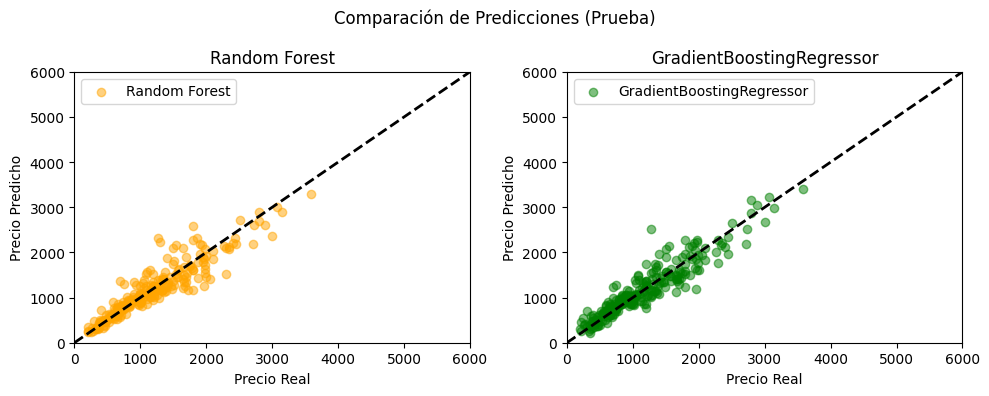

In [111]:
plt.figure(figsize=(10, 4))  # Tamaño reducido

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='orange')
plt.plot([0, 6000], [0, 6000], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest')
plt.xlim(0, 6000)
plt.ylim(0, 6000)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='GradientBoostingRegressor', color='green')
plt.plot([0, 6000], [0, 6000], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('GradientBoostingRegressor')
plt.xlim(0, 6000)
plt.ylim(0, 6000)
plt.legend()

plt.suptitle('Comparación de Predicciones (Prueba)')
plt.tight_layout()
plt.show()


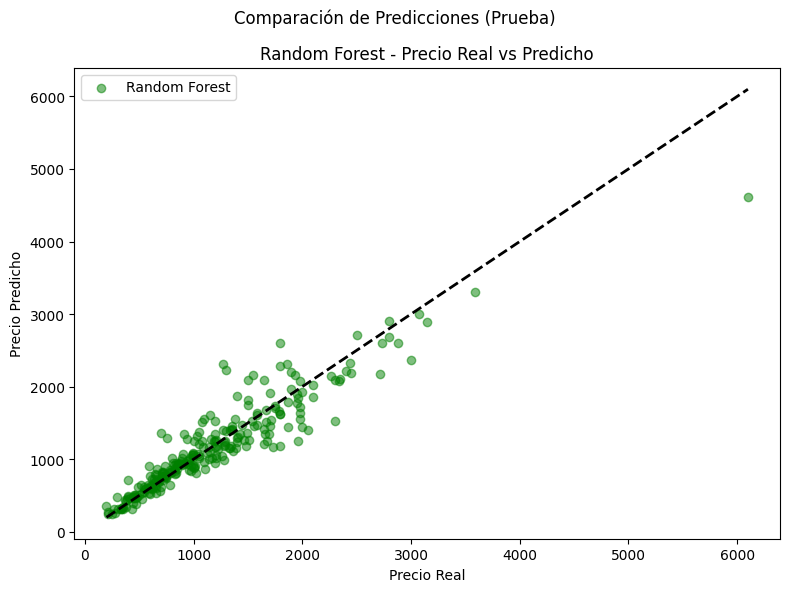

In [112]:
# Gráfico de dispersión de resultados con Random Forest
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest - Precio Real vs Predicho')
plt.legend()

plt.suptitle('Comparación de Predicciones (Prueba)')
plt.tight_layout()
plt.show()


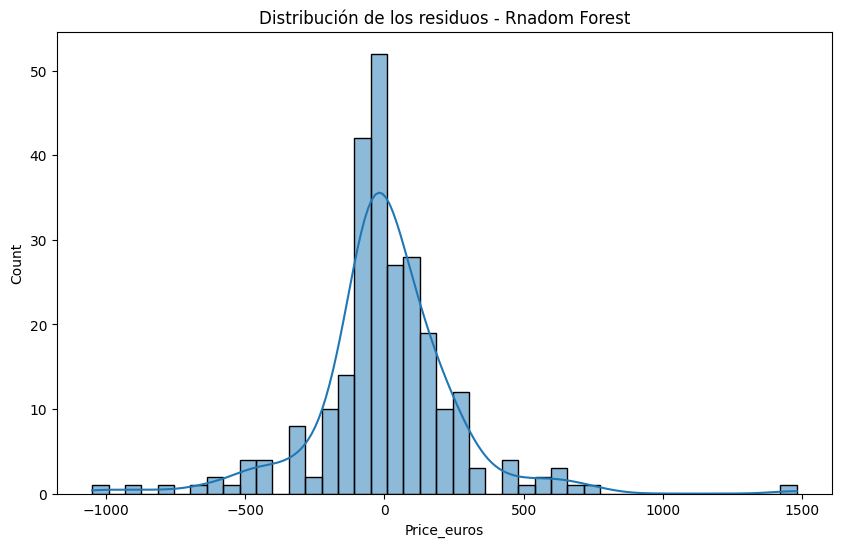

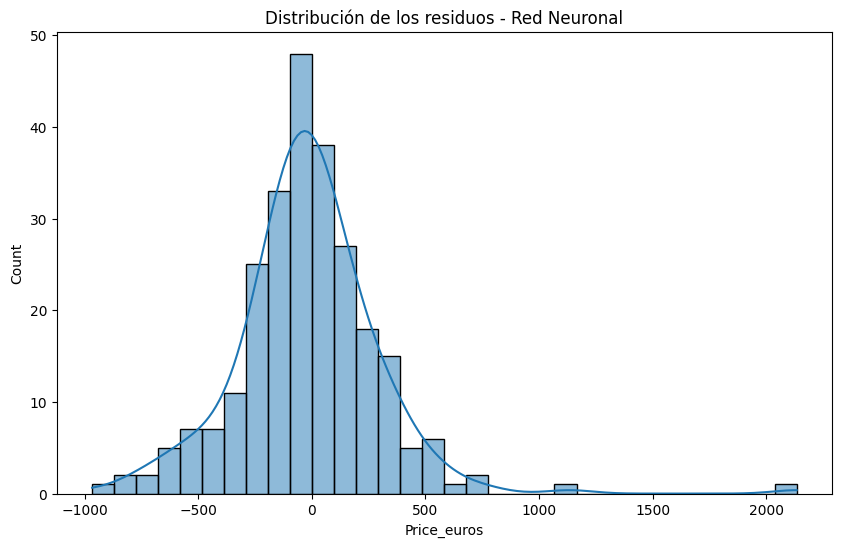

In [113]:
# Gráficos de distribución de residuos para Árbol de Decisión
import seaborn as sns

residuals_tree = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals_tree, kde=True)
plt.title('Distribución de los residuos - Rnadom Forest')
plt.show()

# Gráficos de distribución de residuos para Red Neuronal
residuals_nn = y_test - y_pred_nn
plt.figure(figsize=(10, 6))
sns.histplot(residuals_nn, kde=True)
plt.title('Distribución de los residuos - Red Neuronal')
plt.show()

In [114]:
# # Aplica PCA para eliminar ruido
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)  # mantener el 95% de varianza
# X_pca = pca.fit_transform(X)

# # Split normal
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Mismo modelo
# model_nn.fit(X_train_pca, y_train)
# y_pred_pca = model_nn.predict(X_test_pca)

# print("R² con PCA:", r2_score(y_test, y_pred_pca))


# Evaluación:


Conclusión: Indicar cuál modelo fue mejor y explicar el motivo.


In [115]:
# # importar 
# import joblib
# import pickle
# from tensorflow.keras.models import save_model
# nn_model_filename = "neural_network_model.keras"
# save_model(model_nn, nn_model_filename)

# scaler_filename = "scaler.pkl"
# joblib.dump(scaler, scaler_filename)
# tree_model_filename = "decision_tree_model.pkl"
# joblib.dump(model_tree, tree_model_filename)

# selected_features_filename = "selected_features.pkl"
# with open(selected_features_filename, 'wb') as f:
#     pickle.dump(selected_columns_combined, f)


In [118]:
# hacer predicciones con el modelo
import pandas as pd

# Crear el DataFrame con una sola fila como ejemplo de predicción
laptop_example = pd.DataFrame([{
    "Company": "Apple",                  # Fabricante de la laptop
    "Product": "MacBook Pro",            # Modelo de la laptop
    "TypeName": "Ultrabook",             # Tipo de laptop
    "Inches": 13.3,                      # Tamaño de pantalla en pulgadas
    "Ram": 8,                            # Memoria RAM en GB
    "OS": "macOS",                       # Sistema operativo
    "Weight": 1.37,                      # Peso en kg
    "Screen": "Standard",                # Tipo de pantalla
    "ScreenW": 2560,                     # Resolución de pantalla (ancho)
    "ScreenH": 1600,                     # Resolución de pantalla (alto)
    "Touchscreen": "No",                 # ¿Pantalla táctil?
    "IPSpanel": "Yes",                   # ¿Panel IPS?
    "RetinaDisplay": "Yes",              # ¿Pantalla retina?
    "CPU_company": "Intel",              # Fabricante del procesador
    "CPU_freq": 2.3,                     # Frecuencia del procesador (GHz)
    "CPU_model": "Core i5",              # Modelo del procesador
    "PrimaryStorage": 128,               # Almacenamiento primario (GB)
    "SecondaryStorage": 0,               # Almacenamiento secundario (GB)
    "PrimaryStorageType": "SSD",         # Tipo de almacenamiento primario
    "SecondaryStorageType": "No",        # Tipo de almacenamiento secundario
    "GPU_company": "Intel",              # Fabricante de la tarjeta gráfica
    "GPU_model": "Iris Plus Graphics"    # Modelo de la tarjeta gráfica
}])
# quiero saber el precio de este laptop
# Preprocesar el ejemplo de laptop
laptop_example[categorical_cols] = encoder.transform(laptop_example[categorical_cols])
laptop_example[cols_to_scale] = scaler.transform(laptop_example[cols_to_scale])
# Realizar la predicción
# Hacer la predicción con el modelo
predicted_price_euros = model_gb.predict(laptop_example[selected_columns_combined])
predicted_price_euros = predicted_price_euros[0]  # Obtenemos el valor escalar

# Tipo de cambio (debes actualizarlo con el valor actual)
tipo_cambio = 20.50  # Este es un valor ejemplo, verifica el tipo de cambio actual

# Convertir a pesos mexicanos
predicted_price_mxn = predicted_price_euros * tipo_cambio

print(f"El precio estimado para el laptop es: {predicted_price_euros:.2f} euros")
print(f"Equivalente en pesos mexicanos (MXN): ${predicted_price_mxn:,.2f}")
# Guardar el modelo entrenado
import joblib
model_filename = "laptop_price_model.pkl"
joblib.dump(model_gb, model_filename)       
# Guardar el encoder y el scaler
encoder_filename = "laptop_encoder.pkl"
joblib.dump(encoder, encoder_filename)
scaler_filename = "laptop_scaler.pkl"
joblib.dump(scaler, scaler_filename)    


El precio estimado para el laptop es: 1376.76 euros
Equivalente en pesos mexicanos (MXN): $28,223.56


['laptop_scaler.pkl']